# Lending Club - Case Study

## Prepare Data
### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the input Data (CSV File)

In [2]:
loan = pd.read_csv('loan.csv', header=0)

loan.shape

(39717, 111)

### Initial Analysis

- The Data contains 38717 Records and 111 rows. 
- The data contains many columns which have only 1 unique value in the entire dataset. These columns may not be useful..

#### Analysis of Columns

- The column **id**, **member_id** are person identity columns. Since, this is not specific to loan requesters. 
    - *TODO:* we can remove them. 

- The requested Loan Amount is listed in the column **loan_amnt**
- The Loan amount suggested by the Lending Club at the time of loan issuance is listed in the column **funded_amnt**
- The Loan approved by the investor authority (final loan amount is mentioned in the **funded_amnt_inv**)

- The column **term** represents the tenure of the Loan. We have only 2 values here 36 months and 60 months.
    - *TODO:* clean the data to make it an integer.

- The loan issue date is represented in the column **issue_d**. It has missing day column.
    - *TODO:* Convert this to a DateTime and extract the year and month details.

- The interest rate of the loan approved is mentioned in the **int_rate** column.
    - *TODO:* Clean the data by removing the % so as we can use it for bucketted analysis.

- The **grade** and **sub-grade** are the internal categories assigned by the Lending Club. May be used to differentiate certain entries.

- The column **emp_title** has incomplete information. Employee Title doesn't have any say on the Defaulted loan.. as it is just a job title or name.
    - *TODO:* This column can be removed.

- The column **emp_length** has inadequate data.
    - *TODO:* Try filling in the missing values.
    

- The column **home_ownership** variable indirectly describes the assert class of the loan taker. So, it can be analyzed to identify a correlation across the defaulters.

- The column **annual_inc** has annual incomes and can be used for analysis to identify how it is impacting the defaulters.


- The column **verification_status** has background verification status; an important attribute which can identify the defaulters.

- The column **issue_d** is the loan issued date. We can extract the information of month and year from it.

- The column **loan_status** signifies if the loan is *fully paid/current/charged off*.
    - *TODO:* It may not make any sense to analyze the on-going loans (ie., in current status) as the data will be uncertain (an ongoing loan can be Fully Paid or Charged Off and none of these cases can be known in advance)...


- The column **url**, **desc** are having clearical information and not a driving factor for the Defaulters.
    - *TODO:* Remove these columns from the dataset

- The column **title** has incomplete information. Initial glance at the data, it seems to be a title of an email for loan application. Title doesn't have any say on the Defaulted loan.. as it is just another textual information.
    - *TODO:* This column can be removed.

- The column **purpose** is a categorical variable and can be useful for our analysis.

- The column **addr_state** may be used to extract the impact demographics over the possibility of defaulting.

- The column **zip_code** has masked zip codes and may not provide any granular information on demographics. This can be set aside as we already have addr_state under analysis.

- The column **dti** - Debit to Income, could be an important factor as it determines the economic potential of the member.

- The column **pub_rec** represents number of public derogatory records (previous instances of bad financials with other institutions)... could be a factor that can emphasize a defaulting can happen again with this entry.

- Following set of columns are pointing to the current loan details and may not be useful to analyze on them.
    - delinq_2yrs
    - earliest_cr_line
    - inq_last_6mths
    - mths_since_last_delinq
    - mths_since_last_record
    - open_acc
    - out_prncp
    - out_prncp_inv
    - total_pymnt
    - total_pymnt_inv
    - total_rec_prncp
    - total_rec_int
    - recoveries
    - collection_recovery_fee
    - last_pymnt_d
    - last_pymnt_amnt
    - next_pymnt_d
    - last_credit_pull_d
    - collections_12_mths_ex_med
    - mths_since_last_major_derog

- The column **pub_rec_bankruptcies** may help us identify the previous bankruptcies.
- The column **total_acc** may help us on identifying the Defaulters as it has the info on other loans taken by him and are active.


- Furthermore, there are many columns which have only 1 value. These columns doesn't help us on the analysis as the values are constant for the entire data set.
    - *TODO:* Drop these columns

### Data Cleaning

#### Drop Columns

##### Drop unwanted columns

In [3]:
loan = loan.drop(["id", "member_id", "emp_title", "url", "desc", "title", "zip_code", "delinq_2yrs", "earliest_cr_line", "mths_since_last_delinq", "mths_since_last_record", "open_acc", "revol_bal", "revol_util", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", "collections_12_mths_ex_med", "chargeoff_within_12_mths"], axis=1)

##### Drop columns with only 1 Unique Value

In [4]:
### Columns that have only 1 value in the dataset. They doesn't help us in the analysis and can be ignored.
#for col in loan.columns:
#    if(len(loan[col].unique()) == 1) :
#        print(col)

columns_to_work = loan.columns[loan.apply(lambda x: len(x.unique()) > 1)].tolist()
loan = loan.loc[:, columns_to_work]
loan.info()
loan.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

(39717, 23)

#### Fill-in missing Data

##### Find any missing data in the columns

In [5]:
loan.isna().any()

loan_amnt               False
funded_amnt             False
funded_amnt_inv         False
term                    False
int_rate                False
installment             False
grade                   False
sub_grade               False
emp_length               True
home_ownership          False
annual_inc              False
verification_status     False
issue_d                 False
loan_status             False
purpose                 False
addr_state              False
dti                     False
inq_last_6mths          False
pub_rec                 False
total_acc               False
total_rec_late_fee      False
pub_rec_bankruptcies     True
tax_liens                True
dtype: bool

#### Fill-in the emp_length column

In [6]:
loan[loan.emp_length.isna()].shape

(1075, 23)

- we have ~ 1075 Rows of data with no emp_length. this is a very small number when compared to 39717.
- We can fill the missing information with a value with occurs the most (more frequent data in the column).

In [7]:
# Calculate the mean emp_length

mode_of_emp_length = loan[-loan.emp_length.isna()].emp_length.apply(lambda x: x).mode()

print('Mode of emp_length: '+ mode_of_emp_length[0])

loan.emp_length.fillna(mode_of_emp_length[0], inplace=True)


Mode of emp_length: 10+ years


In [8]:
# Clean the column emp_length

def convert_emp(x):
    if(x=='< 1 year'):
        return 0
    elif(x=='1 year'):
        return 1
    elif(x=='10+ years'):
        return 10
    elif(type(x) == str):
        return x.replace(' years', '')
    else:
        return np.nan

loan['emp_length'] = loan.emp_length.apply(lambda x: convert_emp(x))

In [9]:
#### Fill-in the tax_lien column
loan.tax_liens.unique()

array([ 0., nan])

- The Tax Liens has only 2 values 0.0 and Nan. Filling in doesn't make sense. We can discard this column as well.

In [10]:
loan = loan.drop(["tax_liens"], axis=1)

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

### Data Conversions

### Convert the Date Columns to Datetime...

In [12]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')

#### Extract the Month and Year data from the Issue date Columns

In [13]:
# Add columns for Issue year and month for analysis
loan['issue_year'] = pd.DatetimeIndex(loan.issue_d).year
loan['issue_month'] = pd.DatetimeIndex(loan.issue_d).month

### Rename Columns for Better Readability

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  object        
 4   int_rate              39717 non-null  object        
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_length            39717 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  datetime64[ns]
 13  loan_status     

In [15]:
loan.rename(columns={'loan_amnt' : 'loan_amount', 'funded_amnt': 'funded_amount', 'funded_amnt_inv': 'funded_amount_investor', 'int_rate': 'interest_rate'}, inplace=True)
loan.rename(columns={'issue_d' : 'issue_date', 'annual_inc': 'annual_income', 'total_rec_late_fee' :'total_received_late_fee', 'pub_rec' : 'public_derogatory_records'}, inplace=True)

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   loan_amount                39717 non-null  int64         
 1   funded_amount              39717 non-null  int64         
 2   funded_amount_investor     39717 non-null  float64       
 3   term                       39717 non-null  object        
 4   interest_rate              39717 non-null  object        
 5   installment                39717 non-null  float64       
 6   grade                      39717 non-null  object        
 7   sub_grade                  39717 non-null  object        
 8   emp_length                 39717 non-null  object        
 9   home_ownership             39717 non-null  object        
 10  annual_income              39717 non-null  float64       
 11  verification_status        39717 non-null  object        
 12  issu

## Exploratory Data Analysis

### Univariate Analysis

#### Identify the Data

In [48]:
#Continuous Columns in the data
continuous_columns = ['loan_amount', 'funded_amount', 'funded_amount_investor', 'interest_rate', 'annual_income', 'installment', 'emp_length', 'inq_last_6mths', 'dti', 'public_derogatory_records', 'total_received_late_fee', 'pub_rec_bankruptcies']
categorical_columns = ['term', 'grade', 'sub_grade', 'verification_status', 'home_ownership', 'purpose', 'addr_state', 'issue_year', 'issue_month']

loan.loc[:,continuous_columns].describe()
loan.loc[:,categorical_columns].describe()

,issue_year,issue_month
count,36868.000000,36868.000000
mean,2010.308425,7.109255
std,0.881172,3.411037
min,2007.000000,1.000000
25%,2010.000000,4.000000
50%,2011.000000,7.000000
75%,2011.000000,10.000000
max,2011.000000,12.000000


#### Filter the relavent data to our analysis

In [ ]:
# Our analysis is not on current loans. Hence, ignoring it.
#
loan = loan[loan.loan_status != 'Current']
loan.shape

charged_off_loans = loan[loan.loan_status == 'Charged Off']
fully_paid_loans = loan[loan.loan_status == 'Fully Paid']

#### Identify Outliers in Annual Income Column

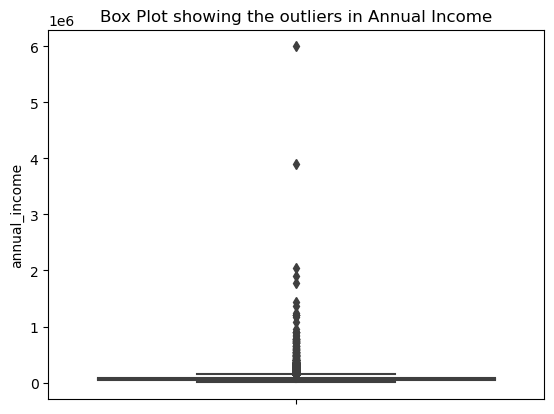

In [22]:
# The data shows that the annual_income series has a very big range of data and may contain outliers.
sns.boxplot(data=loan, y='annual_income')
plt.title('Box Plot showing the outliers in Annual Income')
plt.show()

- annual_income column has outliers. We can limit the annual_income to < 150000

In [25]:
# Filter out the outliers of data.
loan = loan[loan.annual_income<150000]

### Analyzing the Data - Univariate Analysis

#### Analysing the Frequency of the funded_amount_investor values

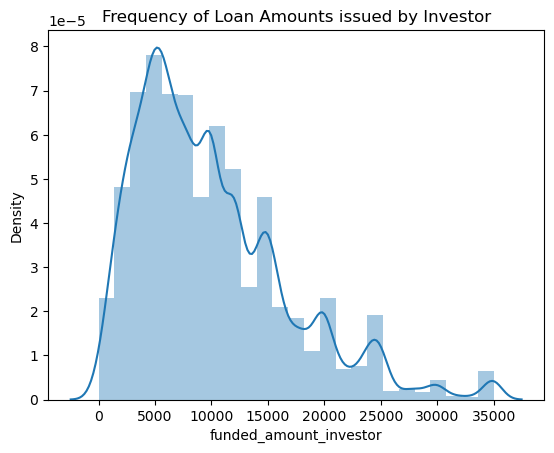

In [47]:
# Analysing the Funded Amount Investor data
plt.title('Frequency of Loan Amounts issued by Investor')
plt.xlabel('Amount funded by the Investor')
#sns.histplot(data=loan, x='funded_amount_investor', bins=25)
sns.distplot(loan.funded_amount_investor, bins=25)
plt.show()

> Most of the loans funded are with an investor fund between <10000

#### Analysing the Frequency of the purpose values

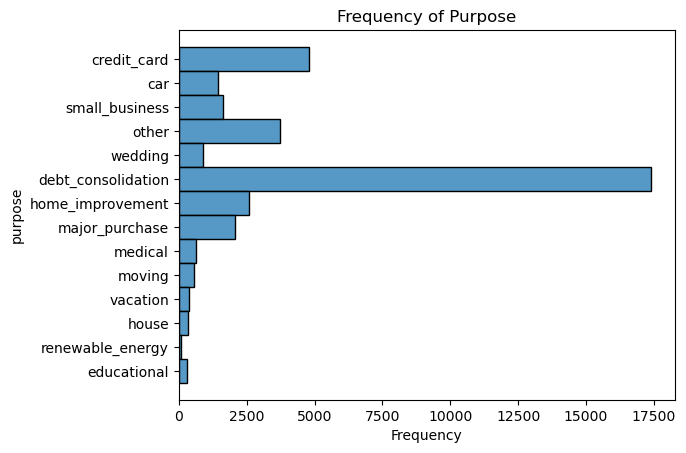

In [54]:
sns.histplot(data=loan, y='purpose')
plt.title('Frequency of Purpose')
plt.xlabel('Frequency')
plt.show()

> Most of the Loans are taken for the purpose of Debt_Consolidation. 

#### Analysing the Frequency of the verification_status values

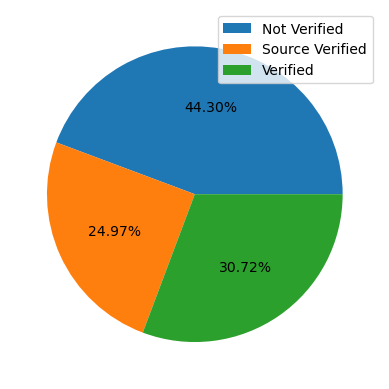

In [59]:
# Let's try analyzing the outliers
verfication_status_data = loan.groupby(by='verification_status').agg({'purpose':'count'})
plt.pie(data=verfication_status_data, x='purpose', autopct="%0.2f%%")
plt.legend(verfication_status_data.index)
plt.show()

> Almost 44% of the loans are not verified. This could be a reason for the defaulters.

#### Analysing the frequency of loans issued during a particular Year & a particular Month

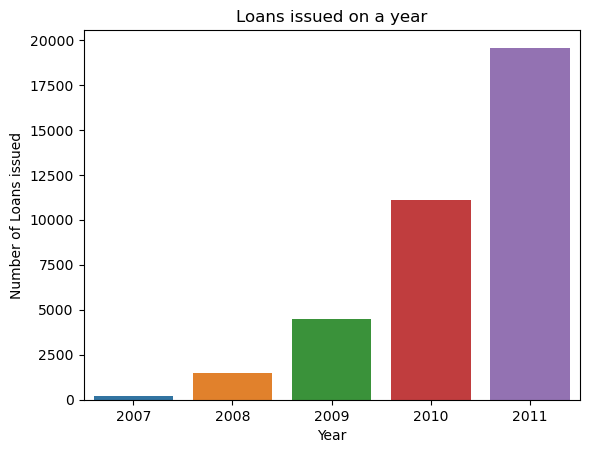

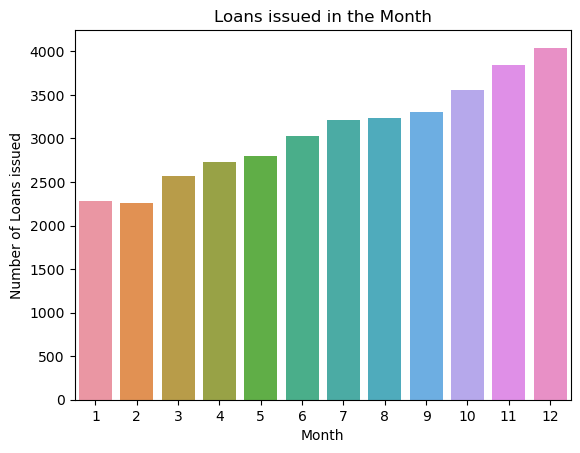

In [61]:

sns.countplot(data=loan, x='issue_year')
plt.xlabel('Year')
plt.ylabel('Number of Loans issued')
plt.title('Loans issued on a year')
plt.show()

sns.countplot(data=loan, x='issue_month')
plt.xlabel('Month')
plt.ylabel('Number of Loans issued')
plt.title('Loans issued in the Month')
plt.show()

> We observe there is a consistent increase of loans issued YOY (Year-on-year). 

> We observe most of the loans are taken during the year 2011.

> Also, most of the loans are issued during the December.
Assuming the data corresponds to US which follows the fiscal year from Jan-Dec; the loans are taken on December could be one of the reason to adjust the financial balance sheets to show in profits.

In [64]:
#### Analysing the frequency of loans issued across the States

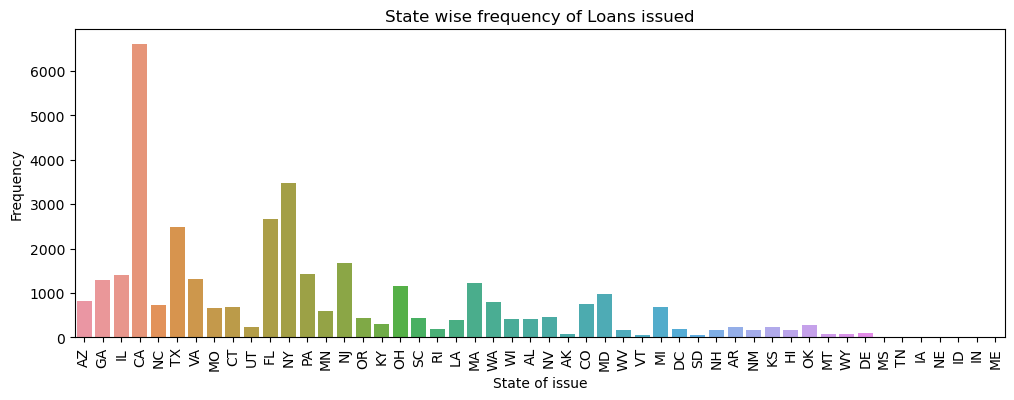

In [84]:
loan.addr_state.value_counts()
plt.figure(figsize=(12,4))
sns.countplot(data=loan, x='addr_state')
plt.title('State wise frequency of Loans issued')
plt.xlabel('State of issue')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

> We observe that the state CA has abnormally high amount of loans issued

#### Analysing the frequency of loans issued across the grade

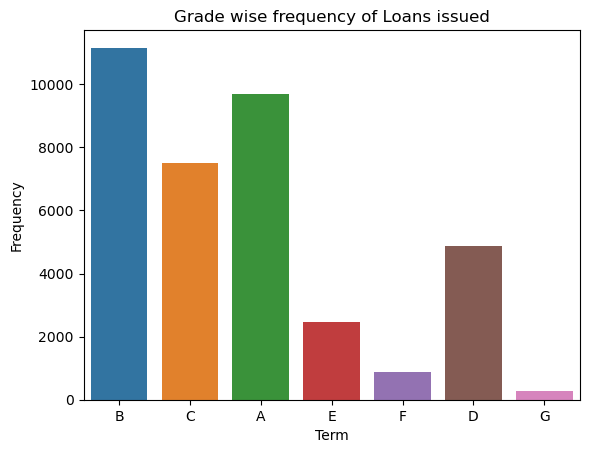

In [77]:
loan.addr_state.value_counts()
sns.countplot(data=loan, x='grade', order=loan.grade.unique().sort())
plt.title('Grade wise frequency of Loans issued')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

#### Analysing the frequency of loans issued across the sub_grade

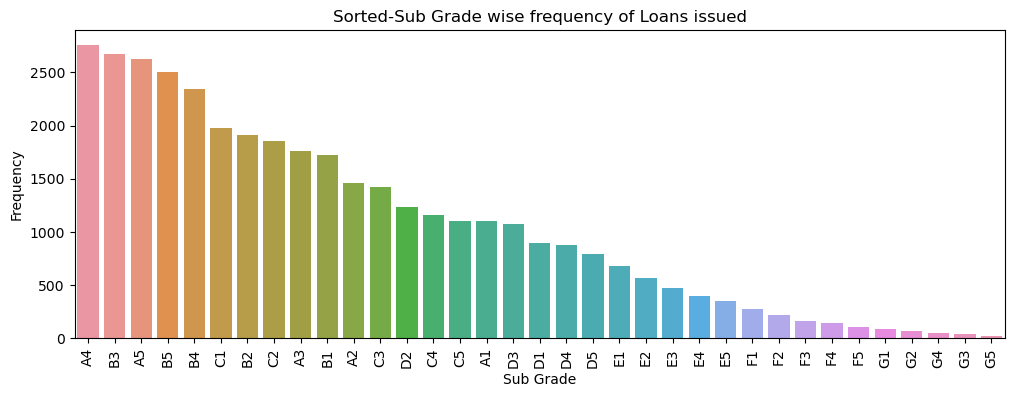

In [91]:
plt.figure(figsize=(12,4))
sub_grades = loan.sub_grade.unique()
sns.countplot(data=loan, x='sub_grade', order=loan['sub_grade'].value_counts().index)
plt.title('Sorted-Sub Grade wise frequency of Loans issued')
plt.xticks(rotation=90)
plt.xlabel('Sub Grade')
plt.ylabel('Frequency')
plt.show()

> The Sub-grade A4 has more loans issued

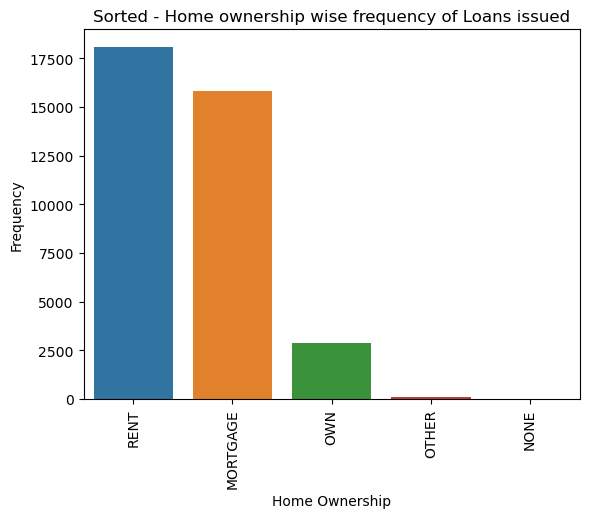

In [93]:
#plt.figure(figsize=(12,4))
sub_grades = loan.sub_grade.unique()
sns.countplot(data=loan, x='home_ownership', order=loan['home_ownership'].value_counts().index)
plt.title('Sorted - Home ownership wise frequency of Loans issued')
plt.xticks(rotation=90)
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.show()

> More loans are given to the people who have home Ownership - Rent.

### *The data contains Fully Paid and Charged Off Loan Types.* Now, we'll analyse only the Charged Off Loan data to extract some metrics